In [3]:
import os

PROJECT_ROOT = os.path.abspath("..")
os.chdir(PROJECT_ROOT)

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Prasanna\XAI-CropCare-Multimodal-DiseaseDetection-SeverityGrading-DecisionSupport


In [5]:
import os
os.getcwd()

'C:\\Users\\Prasanna\\XAI-CropCare-Multimodal-DiseaseDetection-SeverityGrading-DecisionSupport'

In [7]:
import os
import pandas as pd

DATASET_PATH = "data/raw/grapes"

class_counts = {}
for cls in os.listdir(DATASET_PATH):
    cls_path = os.path.join(DATASET_PATH, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image_Count'])
df

,Image_Count
Black_rot,1180
Esca,1383
Healthy,423
Leaf_blight,1076


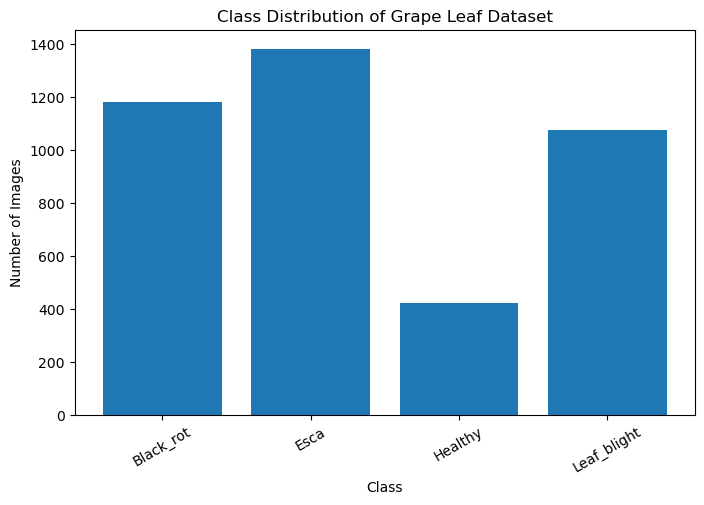

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df.index, df["Image_Count"])
plt.title("Class Distribution of Grape Leaf Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.show()


In [13]:
plt.savefig("outputs/stats/class_distribution.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [15]:
from PIL import Image
import numpy as np

sizes = []

for cls in os.listdir(DATASET_PATH):
    for img in os.listdir(os.path.join(DATASET_PATH, cls)):
        path = os.path.join(DATASET_PATH, cls, img)
        with Image.open(path) as im:
            sizes.append(im.size)

sizes = np.array(sizes)
sizes[:5]

array([[256, 256],
       [256, 256],
       [256, 256],
       [256, 256],
       [256, 256]])

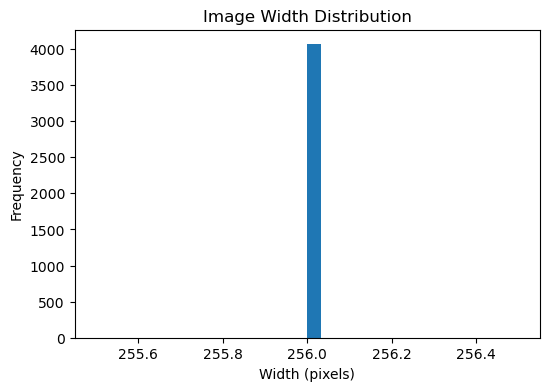

In [16]:
plt.figure(figsize=(6,4))
plt.hist(sizes[:,0], bins=30)
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.show()


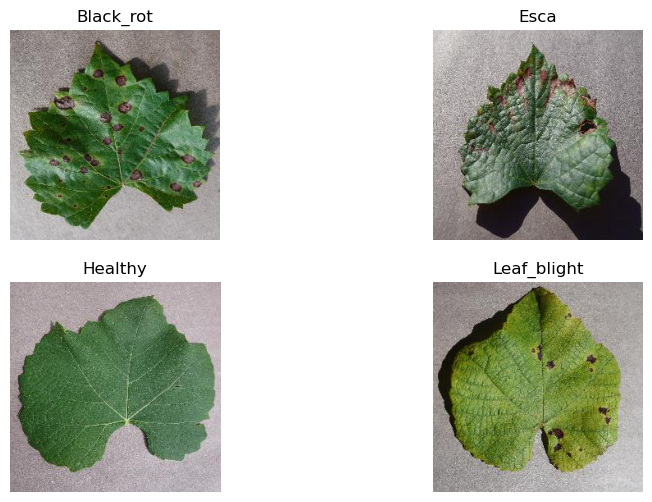

In [19]:
import random

plt.figure(figsize=(10,6))
i = 1
for cls in class_counts.keys():
    img_name = random.choice(os.listdir(os.path.join(DATASET_PATH, cls)))
    img_path = os.path.join(DATASET_PATH, cls, img_name)
    
    plt.subplot(2, 2, i)
    plt.imshow(Image.open(img_path))
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.show()
